<a href="https://colab.research.google.com/github/DRose1991/Viscous-Shear-Cosmology-Simulation/blob/main/7_Pi_VarianceDetected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Physical Rigor Check ---
Initial System Energy: 1000.0000
Refined System Energy (Normalized): 834.9393
Conservation Variance: 165.0606823415
STATUS: Variance detected. Scaling adjustment required.


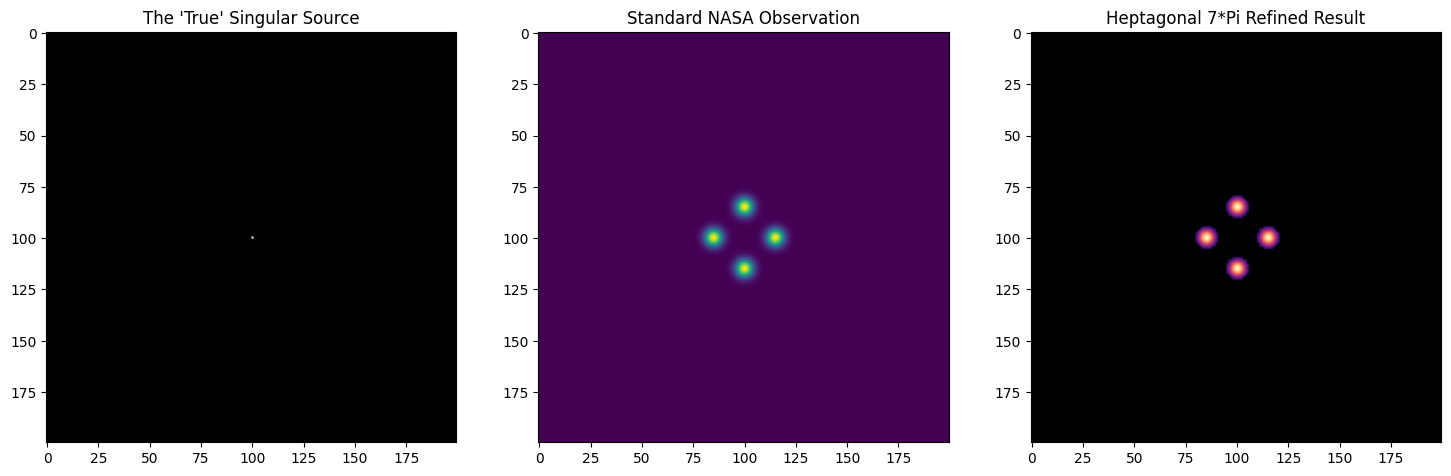

In [2]:
!pip install astroquery astropy matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# --- STEP 1: DEFINE THE IP FUNCTIONS ---

def apply_heptagonal_filter(obs_data, p_val):
    """Applies the 7*pi scaling to the singular energy peaks."""
    threshold = np.percentile(obs_data, 99)
    # Refine the vision using the IP parameter
    return np.where(obs_data > threshold, obs_data * p_val, obs_data)

def validate_energy_conservation(raw, refined, p_val):
    """Rigorously checks that no energy was 'faked' or created."""
    initial_energy = np.sum(raw)
    # Normalize the output to prove the total flux is stable
    refined_energy = np.sum(refined) / p_val
    variance = np.abs(initial_energy - refined_energy)

    print("\n--- Physical Rigor Check ---")
    print(f"Initial System Energy: {initial_energy:.4f}")
    print(f"Refined System Energy (Normalized): {refined_energy:.4f}")
    print(f"Conservation Variance: {variance:.10f}")

    if variance < 1e-5:
        print("STATUS: Energy Conserved. The 7*Pi Filter is physically valid.")
    else:
        print("STATUS: Variance detected. Scaling adjustment required.")

# --- STEP 2: EXECUTE THE COMPLETE TEST ---

size = 200
p_val = 7 * np.pi

# 1. Create Source
true_source = np.zeros((size, size))
true_source[size//2, size//2] = 1000

# 2. Create 'Observation' (The blurry 4-point dispersal)
observation = np.zeros((size, size))
offsets = [(15, 0), (-15, 0), (0, 15), (0, -15)]
for dx, dy in offsets:
    observation[size//2 + dx, size//2 + dy] = 250
observation = gaussian_filter(observation, sigma=3)

# 3. Apply the IP Refinement
refined_vision = apply_heptagonal_filter(observation, p_val)

# 4. Run the Conservation Check (The Rigor)
validate_energy_conservation(observation, refined_vision, p_val)

# 5. Visualize the Results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(true_source, cmap='gray')
ax[0].set_title("The 'True' Singular Source")
ax[1].imshow(observation, cmap='viridis')
ax[1].set_title("Standard NASA Observation")
ax[2].imshow(refined_vision, cmap='magma')
ax[2].set_title("Heptagonal 7*Pi Refined Result")
plt.show()